In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
img = Image.open("lord_einstein.jpg")

In [3]:
tf = transforms.ToTensor()
df = tf(img)

In [4]:
print(df)

tensor([[[1.0000, 0.9569, 1.0000,  ..., 0.9569, 0.9490, 1.0000],
         [0.9529, 0.9843, 0.9020,  ..., 0.9294, 1.0000, 1.0000],
         [1.0000, 0.9569, 0.3373,  ..., 0.6039, 0.8941, 1.0000],
         ...,
         [1.0000, 0.8824, 0.4157,  ..., 0.4824, 0.9529, 1.0000],
         [1.0000, 1.0000, 0.8627,  ..., 0.8824, 1.0000, 1.0000],
         [0.9020, 1.0000, 0.9412,  ..., 0.8863, 0.8980, 1.0000]],

        [[1.0000, 0.9569, 1.0000,  ..., 0.9569, 0.9490, 1.0000],
         [0.9529, 0.9843, 0.9020,  ..., 0.9294, 1.0000, 1.0000],
         [1.0000, 0.9569, 0.3373,  ..., 0.6039, 0.8941, 1.0000],
         ...,
         [1.0000, 0.8824, 0.4157,  ..., 0.4824, 0.9529, 1.0000],
         [1.0000, 1.0000, 0.8627,  ..., 0.8824, 1.0000, 1.0000],
         [0.9020, 1.0000, 0.9412,  ..., 0.8863, 0.8980, 1.0000]],

        [[1.0000, 0.9569, 1.0000,  ..., 0.9569, 0.9490, 1.0000],
         [0.9529, 0.9843, 0.9020,  ..., 0.9294, 1.0000, 1.0000],
         [1.0000, 0.9569, 0.3373,  ..., 0.6039, 0.8941, 1.

In [5]:
print(df.shape)

torch.Size([3, 187, 185])


In [6]:
def conv(image, kernel):
    g = tf(kernel)
    g = torch.cat([g,g,g],dim=-3)
    cv = torch.empty((1,len(image[0])-len(g[0])+1,len(image[0][0]) - len(g[0][0])+1))
    i = 0
    j = 0
    while(j<len(cv[0][0])):
        x = image[:,i:i+len(g[0]),j:j+len(g[0][0])]
        cv[0][i][j] = torch.sum(x*g)
        i += 1
        if(i == len(cv[0])):
            i = 0
            j += 1
        
    return cv
    
def get_kernel(name):
    # return the kernel based on the name
    X = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    G = (1/159)*np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]])
    if(name == "Sobel_X"):
        return X
    if(name == "Sobel_Y"):
        return Y
    if(name == "Gaussian"):
        return G



In [7]:
smoothened = conv(df,get_kernel("Gaussian"))

In [8]:
sobel_x = conv(smoothened,get_kernel("Sobel_X"))
sobel_y = conv(smoothened,get_kernel("Sobel_Y"))

In [9]:
I = torch.sqrt(sobel_x**2 + sobel_y**2)

In [10]:
print(I.size())

torch.Size([1, 181, 179])


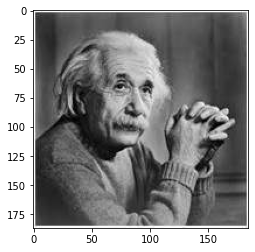

In [11]:
plt.imshow(df.permute(1, 2, 0))

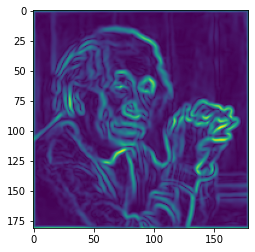

In [12]:
plt.imshow(I.permute(1, 2, 0))